In [3]:
pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.1 MB/s eta 0:00:00


[*********************100%%**********************]  5 of 5 completed


Optimized Weights: OrderedDict([('AAPL', 0.20476), ('AMZN', 0.0), ('GOOGL', 0.0), ('MSFT', 0.0), ('TSLA', 0.79524)])
Expected annual return: 54.1%
Annual volatility: 61.7%
Sharpe Ratio: 0.84
Discrete allocation: {'AAPL': 24, 'TSLA': 96}
Funds remaining: $77.69
Expected annual return: 50.9%
Annual volatility: 57.9%
Sharpe Ratio: 0.84


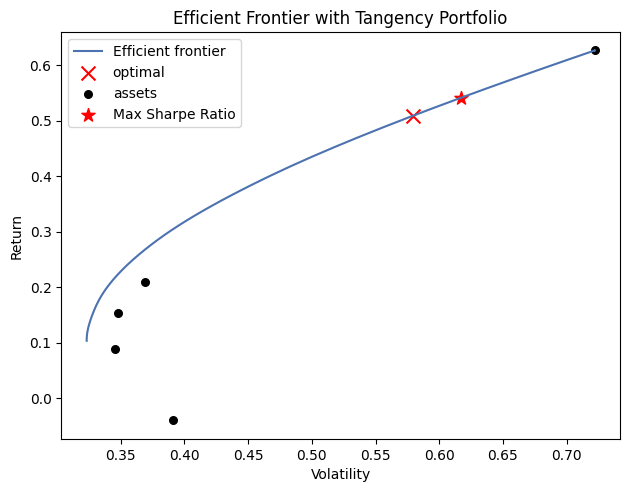

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt.cla import CLA
from pypfopt import plotting

# Step 1: Define the stock symbols and download data
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA"]
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Adj Close']

# Step 2: Calculate expected returns and covariance matrix
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

# Step 3: Optimize for maximum Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print("Optimized Weights:", cleaned_weights)
ef.portfolio_performance(verbose=True)

# Step 4: Allocate Portfolio
latest_prices = get_latest_prices(data)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

# Step 5: Plotting the Efficient Frontier
cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(cla, ax=ax, show_assets=True)

# Highlight the maximum Sharpe ratio
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe Ratio")
ax.set_title("Efficient Frontier with Tangency Portfolio")
ax.legend()
plt.show()
